# Datasets

> __`torchvision`__ package with data loaders for datasets such as: Imagenet, CIFAR10, MNIST, and data transformers for images (i.e. `torchvision.datasets`, `torch.utils.data.DataLoader`). [https://pytorch.org/tutorials/beginner/data_loading_tutorial.html?highlight=torchvision]

> __`torchtext`__ package consists of data processing utilities and popular datasets for NLP. [http://torchtext.readthedocs.io/en/latest/#]



## Vision

In [1]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

#### CIFAR10

In [2]:
##Load and normalize CIFAR10 transforming them to Tensors of normalized range [-1, 1]
##Images of size 3x32x32, 3-channel color images of 32x32 pixels in size
transform = transforms.Compose(
                               [transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), 
                                                     (0.5, 0.5, 0.5))])

trainset = datasets.CIFAR10(root='./dataCIFAR', train=True,
                            download=True, transform=transform)
testset = datasets.CIFAR10(root='./dataCIFAR', train=False,
                           download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)##num_workers=subprocesses to use for data loading
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 
           'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


cat plane ship car


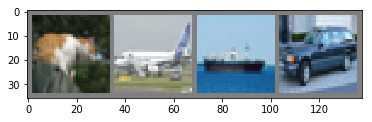

In [7]:
##Visualize training images
import matplotlib.pyplot as plt
import numpy as np

##define a function to visualize images (unnormalize them first)
def imgshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy() ##from tensor to array
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
dataiter = iter(trainloader)
images, labels = dataiter.next() ##get some random training images (4, i.e. batch_size)

#we can also write
#images, labels = next(iter(trainloader))

#show images
imgshow(torchvision.utils.make_grid(images))
#print labels
print(' '.join(classes[labels[j]] for j in range(4)))

##### https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

#### MNIST

In [12]:
##Load MNIST data
##handwritten digits dataset
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307, ), 
                                                     (0.3081, ))])##m and sd of the MNIST training set

trainset = datasets.MNIST(root='./dataMNIST', train=True,
                          download=True, transform=transform)
testset = datasets.MNIST(root='./dataMNIST', train=False,
                         download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, shuffle=True, batch_size=4)
testloader = torch.utils.data.DataLoader(testset, shuffle=True, batch_size=4)

3 5 6 9


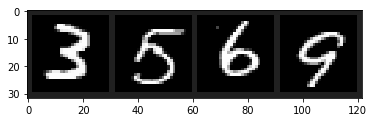

In [27]:
##Visualize data
import matplotlib.pyplot as plt
import numpy as np

def imgshow(img):
    mean = 0.1307
    sd = 0.3081
    img = (img * mean) + sd
    img = img.numpy()[0]
    plt.imshow(img, cmap='gray')
    
images, labels = next(iter(trainloader))
imgshow(torchvision.utils.make_grid(images))
print(' '.join('%1d' % labels[i].item() for i in range(4)))

##### (Subramanian, V. Deep Learning with PyTorch: A practical approach to building neural network models using PyTorch, 2018)

<small><small> Code in the book is not really pythonic. However, it contains a useful overview of what can be done with PyTorch. </small> </small>

## NLP

In order to process text data, we need to convert them into numerical representations. This process, called __vectorization__ can be done:

- __convert__ text into words and words into vectors;
- __convert__ text into characters and characters into vectors;

- create __n-gram__ of words and represent them as vectors.

Each smaller unit of text is called __token__, hence the process of breaking a text into tokens is called __tokenization__. The most popular approaches to convert a token into a vector are: _one-hot encoding_ and _word embedding_.

In one-hot encoding, each token is represented as a vector of size $N$, where $N$ is the size of the vocabulary (i.e. total number of unique words in the document). The one-hot representation of a vocabulary has dimension $|V|\times |V|$.

Word embedding is a popular way of representing text data in problems solved by deep learning algorithms. Word embedding provides a representation of a word. The dimension of the vector is a hyper-parameter set during training phase. The representation of a vocabulary becomes $|V|\times D$, where $D$ is the dimension to be set. One way to create word embeddings is to start with dense vectors for each token containing random numbers, and then train a model such as a document classifier. Hence, the numbers representing the tokens will get adjusted such that semantically closer words will have smaller vectorial distance. 

In [30]:
import torchtext
import torchtext.datasets as datasets
from torchtext.vocab import GloVe
from torchtext import data

#### IMDB

In [58]:
##Download the IMDB dataset and split it into train and test

##setup fields (define a datatype together with instructions for converting to Tensor)
TEXT = data.Field(lower=True, include_lengths=True, batch_first=True) 
##LOWER=lowercase the text,
##INCLUDE_LENGTHS=if True returns a tuple of a padded minibatch 
##(i.e. all sample in the minibatch have the same length) and a list containing the lengths of each examples
##BATCH_FIRST=produce tensor with the batch dimension first
##FIX_LENGTH=fixed length that all examples using this field will be padded to
LABEL = data.Field(sequential=False) 
##SEQUENTIAL=datatype does not represents sequential data

In [59]:
##make splits for data 
train, test = datasets.IMDB.splits(TEXT, LABEL)
##build the vocabulary
TEXT.build_vocab(train, vectors=GloVe(name='6B', dim=300)) ##build vocabulary with available pretrained vectors
LABEL.build_vocab(train)

##SPLIT APPROACH
train_iter, test_iter = data.BucketIterator.splits((train, test),
                                                    batch_size=4, device=0)

##ITERS APPROACH
#train_iter, test_iter = datasets.IMDB.iters(batch_size=4)

The vocabulary class (e.g. `TEXT.vocab` instance in this case) has three attributes: `freqs`, `stoi`, `itos`. `freqs` holds the frequencies of tokens in the data used to build the vocabulary. `stoi` stores the instance mapping token strings to numerical identifiers. `itos` stores a list of token strings indexed by their numerical identifiers.

GloVe stands for _Global Vector for word representation_ (Pennington, J., et al. 2014) and it is an alternative to Word2vec based on global counts of words across the corpus. What we are using here is one of the multiple sets of pre-trained vectors that are available for download. In building the vocabulary the `vectors` parameter can be instantized with a list of pretrained vectors.